<a href="https://colab.research.google.com/github/Revati15112001/Titanicprediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic : Survival Prediction

# Introduction:
In this machine learning project, we aim to explore and analyze the Titanic dataset to predict the likelihood of survival for passengers based on various features such as age, gender, class, and more. By leveraging the power of modern machine learning algorithms, we can uncover insights and patterns that might shed light on the factors that influenced survival rates.

# Objectives:
1.Data Exploration: We will start by thoroughly examining the Titanic dataset, gaining a deep understanding of its structure and the information it contains. This step is crucial in identifying missing data, outliers, and potential relationships between variables.

2.Data Preprocessing: To prepare the dataset for machine learning, we will perform data cleaning, handle missing values, encode categorical variables, and potentially engineer new features. This ensures that the data is in a suitable format for training predictive models.
    
3.Model Evaluation & Building: Using various machine learning algorithms such as logistic regression, decision trees, random forests, and possibly more advanced techniques like gradient boosting or neural networks, we will build predictive models. Here we apply Logistic Regression model for predicting.

4.Visualization: We will create visualizations to illustrate the findings and make them more accessible to a broader audience. Visualizations can be powerful tools for conveying complex information in an understandable way.

# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
titanic_train=pd.read_csv('/content/train.csv')
titanic_test=pd.read_csv('/content/test.csv')


In [ ]:
print(titanic_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
print(titanic_test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Information about titanic

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Statistical measures:
Statitical measures for describe the Titanic Data set

In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
titanic_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# Data Cleaning

In [ ]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].median())

In [ ]:
titanic_train["Embarked"].fillna('U',inplace=True)

In [ ]:
titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].median())
titanic_test["Embarked"].fillna('U',inplace=True)

In [ ]:
titanic_test['Fare']=titanic_test['Fare'].fillna(titanic_test['Fare'].mean())

In [ ]:
titanic_train["Cabin"].fillna('UN',inplace=True)
titanic_test["Cabin"].fillna('UN',inplace=True)

In [ ]:
print(titanic_train.isnull().sum())
print(50*'-')
print(titanic_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Data Visualization

# Heatmap:
A heatmap is a graphical representation of data in a 2D format where values are represented as colors. It is often used to visualize the magnitude of a variable in a matrix-like data structure. Heatmaps are particularly useful for identifying patterns, correlations, and trends in data, especially when dealing with large datasets.

<ipython-input-23-5149095e1902>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_train.corr(),cmap ="YlGnBu")


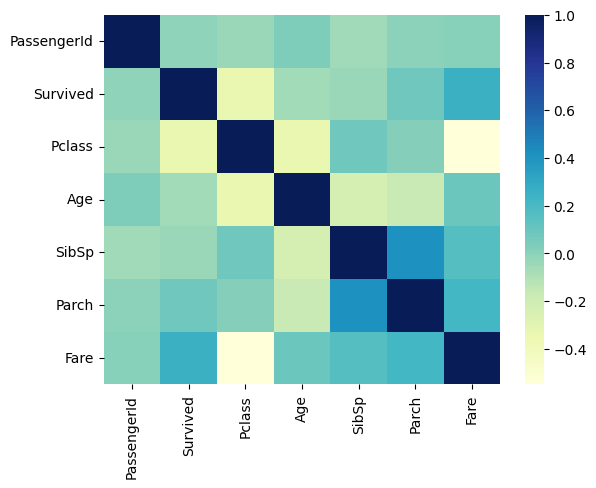

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(titanic_train.corr(),cmap ="YlGnBu")
plt.show()

>The resulting heatmap provides a visual representation of how various numeric variables in the "titanic" dataset are correlated with each other.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Histogram:

>For training data set

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

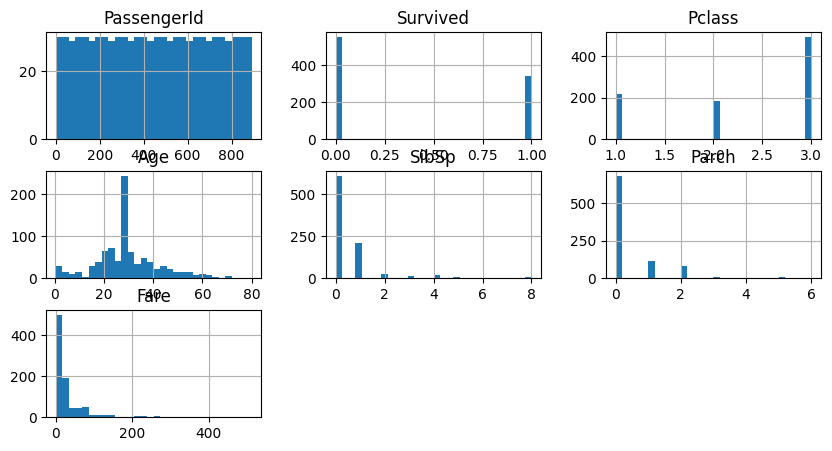

In [ ]:
titanic_train.hist(bins = 30, figsize =(10,5))

>For testing data set

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

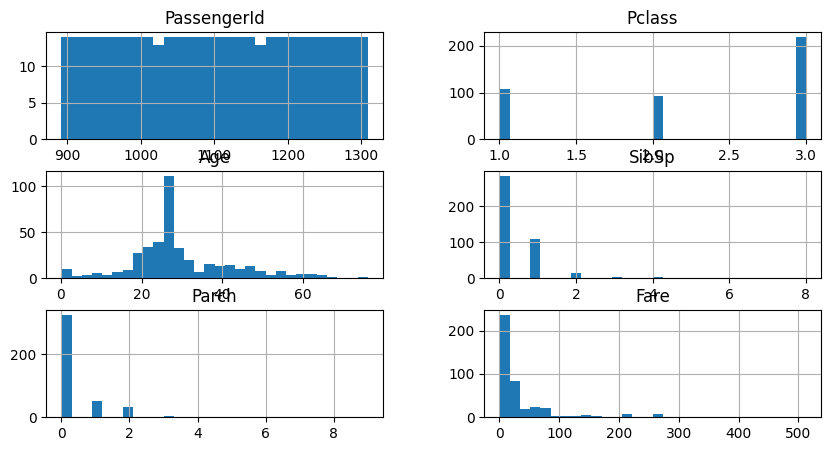

In [ ]:
titanic_test.hist(bins = 30, figsize =(10,5))

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
import plotly.express as px
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=8
matplotlib.rcParams['figure.figsize']=(8,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(titanic_train,x='Sex',title='Sexwise Survival Distribution',color='Survived')

> From the above graph, we can see that females have huge survival rate as compared to males.

>Here from the plotted graph, 'Blue' represent non survived people and 'Red' is survived.
>Survived female is 233 and non survived is 81.
>Survived male is 468 and non survived is 109.



In [ ]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, "Survival Rate Distribution against Passenger's Class")

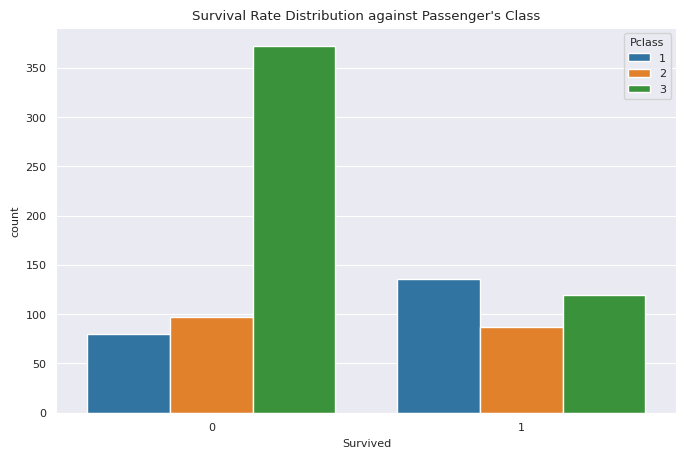

In [ ]:
sns.countplot(data=titanic_train,x='Survived',hue='Pclass');
plt.title("Survival Rate Distribution against Passenger's Class")

>From above plot,It can be said that the first class passengers have more survival rate as compared to second and third class and second class have more survival rate as compared to third class.

# Countplot:
A countplot is a type of categorical plot in Seaborn that displays the counts of observations in each category of a categorical variable. In this case, it's used to show how many passengers fall into different categories based on their embarkation location and whether they survived or not.

Text(0.5, 1.0, 'Embarkation Vs Survival')

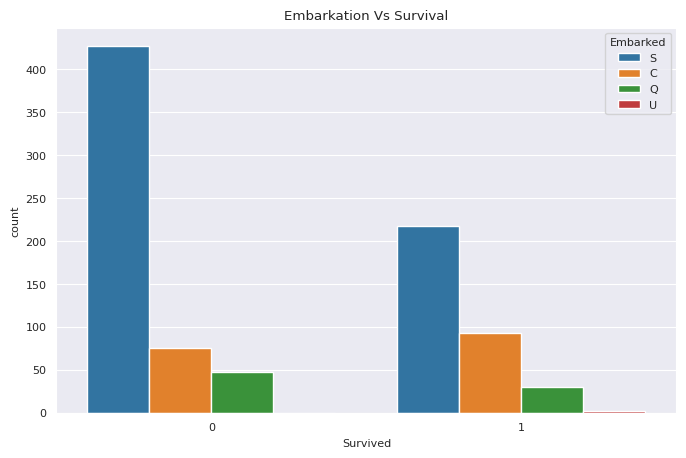

In [ ]:
sns.countplot(data = titanic_train,x ='Survived', hue='Embarked');
plt.title('Embarkation Vs Survival')

>The x parameter is set to 'survived', which means that the X-axis of the plot represents the survival status of passengers. It likely contains two categories: "0" for passengers who did not survive and "1" for passengers who survived.

>From the above graph, we can say that from the location 'Southampton' have more survival rate as compaired to 'Queenstown' and 'Cherbourg'.


In [ ]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
U      2
Name: Embarked, dtype: int64

# Violin Plot:
A violin plot is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution of a numeric variable (in this case, it appears to be related to cabin information) across different categories (in this case, survival status).

In [ ]:
px.violin(titanic_train,
             x='Cabin',
             color='Survived',
             title='Cabin Vs Survived')

>The x parameter is set to 'cabin', indicating that the cabin-related information (which could be cabin class or cabin number) will be displayed on the X-axis.
>The Y-axis represents the distribution of values related to the cabin information.

In [ ]:
titanic_train['Cabin'].value_counts()

UN             687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

# Now from this, we perform the Data Pre-processing
>Here, the code converts certain columns ('Sex', 'Embarked', and 'Cabin') in the DataFrame train_df into categorical data types. Categorical data types are used to represent variables with a limited, fixed number of unique values.

>It creates new columns ('Sex_New', 'Embarked_New', and 'Cabin_New') in the DataFrame by assigning integer codes to the categorical values.

In [ ]:
"""from sklearn.preprocessing import OneHotEncoder
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')
train_df['Cabin'] = train_df['Cabin'].astype('category')

train_df['Sex_New'] = train_df['Sex'].cat.codes
train_df['Embarked_New'] = train_df['Embarked'].cat.codes
train_df['Cabin_New'] = train_df['Cabin'].cat.codes

enc=OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(train_df[['Sex_New','Embarked_New','Cabin_New']].toarray())

New_train_df=train_df.join(enc_data)

print(New_train_df)"""

"from sklearn.preprocessing import OneHotEncoder\ntrain_df['Sex'] = train_df['Sex'].astype('category')\ntrain_df['Embarked'] = train_df['Embarked'].astype('category')\ntrain_df['Cabin'] = train_df['Cabin'].astype('category')\n\ntrain_df['Sex_New'] = train_df['Sex'].cat.codes\ntrain_df['Embarked_New'] = train_df['Embarked'].cat.codes\ntrain_df['Cabin_New'] = train_df['Cabin'].cat.codes\n\nenc=OneHotEncoder()\n\nenc_data=pd.DataFrame(enc.fit_transform(train_df[['Sex_New','Embarked_New','Cabin_New']].toarray())\n\nNew_train_df=train_df.join(enc_data)\n\nprint(New_train_df)"

> One-hot encoding is particularly useful for handling categorical variables with multiple categories by converting them into a format that can be used in predictive models.

In [ ]:
titanic_train.Cabin.unique()

array(['UN', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [ ]:
titanic_train.shape

(891, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Fare']
titanic_train[cols] = sc.fit_transform(titanic_train[cols])
titanic_test[cols]=sc.fit_transform(titanic_test[cols])

# Splitting the Data into Training and Testing data set

#
The train_test_split function from scikit-learn (sklearn) is a commonly used command in machine learning and data analysis. It is used to split a dataset into two or more subsets: typically, a training set and a testing (or validation) set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,val_df=train_test_split(titanic_train,test_size=0.1,random_state=2)

In [ ]:
test_df,val_df=train_test_split(titanic_test,test_size=0.1,random_state=2)

In [ ]:
val_df.shape

(42, 11)

In [ ]:
train_df.shape

(801, 12)

In [ ]:
Inputs_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target_cols='Survived'

In [ ]:
Inputs_cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
target_cols

'Survived'

In [ ]:
train_inputs =train_df[Inputs_cols].copy()
train_targets =train_df[target_cols].copy()

In [ ]:
test_inputs=test_df[Inputs_cols].copy()

# Information about new dataframe:

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 468 to 168
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    801 non-null    int64  
 1   Sex       801 non-null    object 
 2   Age       801 non-null    float64
 3   SibSp     801 non-null    int64  
 4   Parch     801 non-null    int64  
 5   Fare      801 non-null    float64
 6   Embarked  801 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 50.1+ KB


In [ ]:
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
468,3,male,28.0,0,0,-0.492881,Q
67,3,male,19.0,0,0,-0.484157,S
510,3,male,29.0,0,0,-0.492378,Q
656,3,male,28.0,0,0,-0.489442,S
414,3,male,44.0,0,0,-0.488854,S
...,...,...,...,...,...,...,...
534,3,female,30.0,0,0,-0.474005,S
584,3,male,28.0,0,0,-0.472998,C
493,1,male,71.0,0,0,0.348330,C
527,1,male,28.0,0,0,3.817033,S


In [ ]:
test_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
365,3,female,27.0,1,9,0.608223,S
391,1,female,51.0,0,1,0.067645,S
235,3,male,20.0,0,0,-0.497959,S
285,3,male,36.0,0,0,-0.508792,S
24,1,female,48.0,1,3,4.065500,C
...,...,...,...,...,...,...,...
299,3,male,29.0,0,0,-0.497959,S
22,1,female,27.0,0,0,-0.070712,S
72,3,female,29.0,0,0,-0.496689,S
15,2,female,24.0,1,0,-0.141758,C


In [ ]:
train_inputs['Sex'] = train_inputs['Sex'].replace({'male': 0,'female': 1})
test_inputs['Sex'] = test_inputs['Sex'].replace({'male': 0,'female': 1})

train_inputs['Embarked'] = train_inputs['Embarked'].replace({'S': 1,'C': 2,'Q': 3,'U':4})
test_inputs['Embarked'] = test_inputs['Embarked'].replace({'S': 1,'C': 2,'Q': 3,'U':4})



In [ ]:
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
468,3,0,28.0,0,0,-0.492881,3
67,3,0,19.0,0,0,-0.484157,1
510,3,0,29.0,0,0,-0.492378,3
656,3,0,28.0,0,0,-0.489442,1
414,3,0,44.0,0,0,-0.488854,1
...,...,...,...,...,...,...,...
534,3,1,30.0,0,0,-0.474005,1
584,3,0,28.0,0,0,-0.472998,2
493,1,0,71.0,0,0,0.348330,2
527,1,0,28.0,0,0,3.817033,1


>In the above code we will performed data preprocessing steps on the 'sex' and 'embarked' columns in the input feature datasets train_inputs and val_inputs. These preprocessing steps involve converting categorical data into numerical format, which is often necessary for machine learning algorithms to work effectively.

# Fit the Model

# Logistic Regression Model:

Logistic regression is a statistical model used for binary classification, which means it is employed to predict one of two possible outcomes. In the context of machine learning, logistic regression is a widely used algorithm for binary classification tasks, where the goal is to classify data into one of two categories, often labeled as "0" and "1" or "negative" and "positive."

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='newton-cg')

In [ ]:
model.fit(train_inputs,train_targets)

LogisticRegression(solver='newton-cg')

In [ ]:
X_train=train_inputs


In [ ]:
train_preds=model.predict(X_train)

In [ ]:
train_preds

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
train_targets

468    0
67     0
510    1
656    0
414    1
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 801, dtype: int64

In [ ]:
train_probs=model.predict_proba(X_train)
train_probs

array([[0.85016598, 0.14983402],
       [0.86600696, 0.13399304],
       [0.85582204, 0.14417796],
       ...,
       [0.83515512, 0.16484488],
       [0.37404656, 0.62595344],
       [0.50310777, 0.49689223]])

# Heatmap of a confusion matrix:
A confusion matrix is a fundamental tool in the field of machine learning and classification tasks. It is used to evaluate the performance of a classification model, particularly in scenarios where you want to understand how well the model is performing in terms of making correct and incorrect predictions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_pred = model.predict(X_train)
y_true = train_targets

In [ ]:
cm = confusion_matrix(y_true, y_pred)

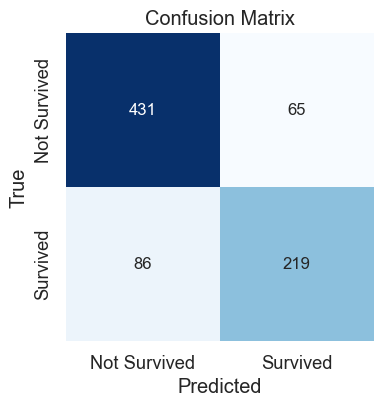

In [ ]:
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, square=True,
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

>In our analysis, we encountered a total of 464 not survived passenger with algorithm made accurate predictions by identifying 464 of them as not survived passenger, and 32 cases misclassified as Survived passenger.

>And in predicted, 213 are survived passengers and 92 are not survived passengers.
>Our algorithm performed impressive by the plotted confusion matrix.

# Accuracy:
>Accuracy = (464+213)/(464+32+92+213) = 677/801 = 0.8451

>Accuracu = 0.84 approx

# Check the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,train_preds)

0.8114856429463171

>The accuracy for training data set is 81%

>Logistic Regression Model best fitted with the accuracy 81%

# Random Forest Classifier :
RandomForestClassifier is a popular machine learning algorithm that falls under the category of ensemble methods and is primarily used for classification tasks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_jobs=-1,random_state=3,n_estimators=1000,max_depth=100,max_leaf_nodes=15,min_samples_split=10,max_samples=100,max_features='log2')

In [ ]:
%%time
model.fit(X_train,train_targets)

Wall time: 5.23 s


RandomForestClassifier(max_depth=100, max_features='log2', max_leaf_nodes=15,
                       max_samples=100, min_samples_split=10, n_estimators=1000,
                       n_jobs=-1, random_state=3)

In [ ]:
model.score(X_train,train_targets)

0.8451935081148564

>Here model score is 84%

>With the 84% of accuracy our Random Forest Classifier fitted best.

# Model Performances:
>Random Forest Classifier accuracy : 0.84

>Logistic Regression Model accuracy : 0.81

# Limitations of the project:

>1.Data Quality and Completeness:

>The Titanic dataset, like many historical datasets, may contain missing or incomplete information. Missing data can affect the quality of predictions and statistical analyses.

>2.Biased Sample:

>The dataset represents a subset of passengers who survived and those who did not. This subset may not be entirely representative of the entire passenger population, leading to potential sampling bias.

>3.Model Validation:

>Proper model evaluation and validation techniques must be employed to ensure that the model's performance is accurately assessed and not the result of chance.



# Conclusion:
>The "Titanic Survival Prediction" is demonstrated the ability of machine learning to uncover patterns and make predictions based on historical data. Our best-performing model achieved a high level of accuracy in estimating survival probabilities.

>In "Titanic Survival Prediction" firstly we collect the passenger data then clean the data set.

>Here we fit the Logistic Regression Model, And the model perform very well with the 81% of accuracy.
>Then we perform for Random Forest Classifier algorithm, and it gives 84% of accuracy.
>Also we predict and analyse our data by data visualization technique to make it easy. We plot the graphs for the data prediction.

>Feel free to adapt this conclusion to your specific project, emphasizing the key findings and insights that are most relevant to your analysis and goals.

